In [1]:
%pip install matplotlib==3.8

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0
Note: you may need to restart the kernel to use updated packages.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


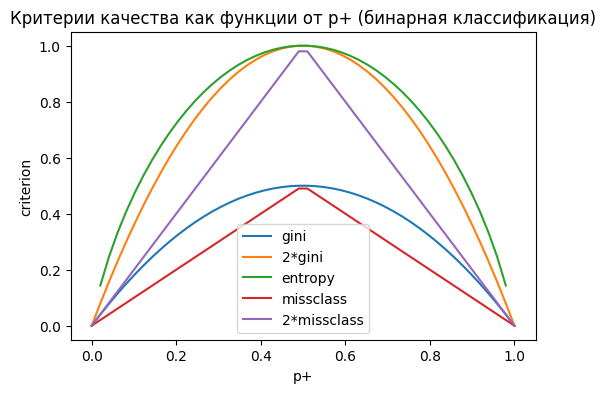

In [2]:
from __future__ import division, print_function
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams["figure.figsize"]=(6,4)
xx = np.linspace(0,1,50)
plt.plot(xx,[2*x*(1-x) for x in xx], label="gini")
plt.plot(xx,[4*x*(1-x) for x in xx], label="2*gini")
plt.plot(xx,[-x*np.log2(x)-(1-x)*np.log2(1-x) for x in xx], label="entropy")
plt.plot(xx,[1 - max(x,1-x) for x in xx], label="missclass")
plt.plot(xx,[2-2*max(x,1-x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Критерии качества как функции от p+ (бинарная классификация)")
plt.legend()

In [6]:
train_file = "lec_12_csv/train.csv"
test_file = "lec_12_csv/test.csv"
gender_submission_file = "lec_12_csv/gender_submission.csv"


In [7]:
df = pd.read_csv(train_file)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [15]:
# filling the gaps
df["Age"] = df["Age"].fillna(0) # 177 NaN
df["Cabin"] = df["Cabin"].fillna("Unknown") # 687 NaN
df["Embarked"] = df["Embarked"].fillna("Unknown") # 2 NaN

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([[891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [834.,  57.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 6 BarContainer objects>)

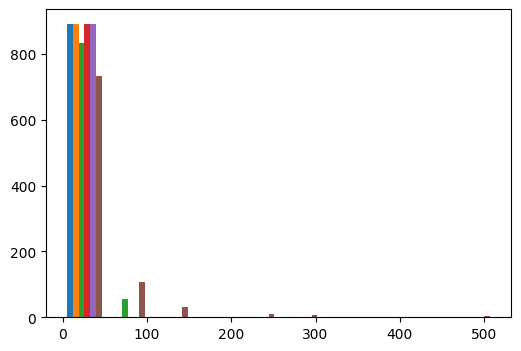

In [19]:
plt.hist(df[["Pclass", "Survived", "Age", "SibSp", "Parch", "Fare"]])

([<matplotlib.patches.Wedge at 0x7fa9e6463280>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'Male'),
  Text(0.4919455057964525, -0.9838646346559433, 'Female')])

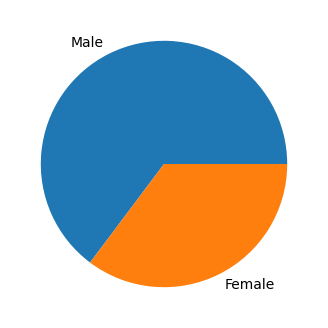

In [23]:
plt.pie(df["Sex"].value_counts(), labels=["Male","Female"])

<Axes: >

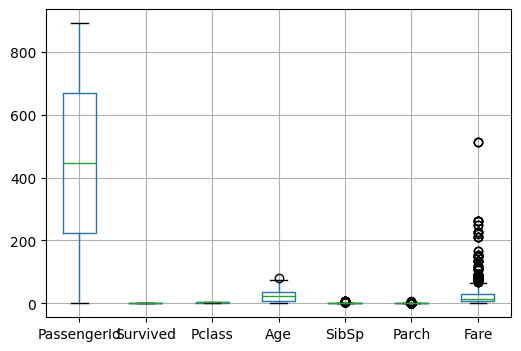

In [26]:
df.boxplot()